In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as pt

In [2]:
dataset=pd.read_csv("Bengaluru_House_Data.csv")
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
print(dataset.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [5]:
print(dataset.area_type.value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64


In [6]:
dataset.shape

(13320, 9)

In [7]:
df1=dataset.drop(['area_type','society','balcony','availability'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:

new_set=df1.dropna()
new_set.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
new_set['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# making a new column
new_set['BHK']=new_set['size'].apply(lambda x:int(x.split(" ")[0]))

C:\Users\Owner\AppData\Local\Temp/ipykernel_16388/4068437514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_set['BHK']=new_set['size'].apply(lambda x:int(x.split(" ")[0]))


In [11]:
new_set.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
# new_set_final=new_set.drop['size']
new_set['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
# queary
new_set[new_set.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
new_set['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def con_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
new_set[~new_set['total_sqft'].apply(con_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
print(new_set.total_sqft.value_counts())

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: total_sqft, Length: 2067, dtype: int64


In [18]:
# solve the range function
def con_range(x):
    token=x.split("-")
    if(len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None
        

In [19]:
print(con_range("2100-2850"))

2475.0


In [20]:
print(con_range("34.46Sq. Meter"))

None


In [21]:
new_set_update=new_set.copy()
new_set_update['total_sqft']=new_set_update['total_sqft'].apply(con_range)
new_set_update.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Enginnering


In [22]:
dataset_new=new_set_update.copy()
dataset_new['price_per']=dataset_new['price']*10000/dataset_new['total_sqft']

In [23]:
dataset_new.head()

,location,size,total_sqft,bath,price,BHK,price_per
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [24]:
dataset_new.location.unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(dataset_new.location.unique())


1304

## technique to reduce categories

In [26]:
dataset_new['location']=dataset_new.location.apply(lambda x:x.strip())
dataset_new.head()

,location,size,total_sqft,bath,price,BHK,price_per
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


### groupby and agrregate the Loaction

In [27]:
loc_status=dataset_new.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [28]:
loc_status

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
loc_less10=loc_status[loc_status<=10]
loc_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
dataset_new.location=dataset_new.location.apply(lambda x:'other' if x in loc_less10 else x)

In [31]:
len(dataset_new.location.unique())

242

In [32]:
dataset_new.head()

,location,size,total_sqft,bath,price,BHK,price_per
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


Relation between BHK and total_sqft

In [33]:
dataset_new[dataset_new.total_sqft/dataset_new.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per
9,other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,other,3 Bedroom,500.0,3.0,100.0,3,2000.000000


In [34]:
dataset_new.shape

(13246, 7)

Remove some outlier

In [35]:
dataset_new_bhk_remove=dataset_new[~(dataset_new.total_sqft/dataset_new.BHK<300)]
dataset_new_bhk_remove.shape

(12502, 7)

In [36]:
dataset_new_bhk_remove.price_per.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per, dtype: float64

In [37]:
def remove_priceper_outliers(x):
    x_out=pd.DataFrame()
    for k,s in x.groupby('location'):
        m=np.mean(s.price_per)
        st=np.std(s.price_per)
        reduce_df=s[(s.price_per>(m-st)) & (s.price_per<=(m+st))]
        x_out=pd.concat([x_out,reduce_df],ignore_index=True)
    return x_out
new_update_data=remove_priceper_outliers(dataset_new_bhk_remove)
new_update_data.shape

(10241, 7)

Some Correct visualization 2BHK vs 3BHK

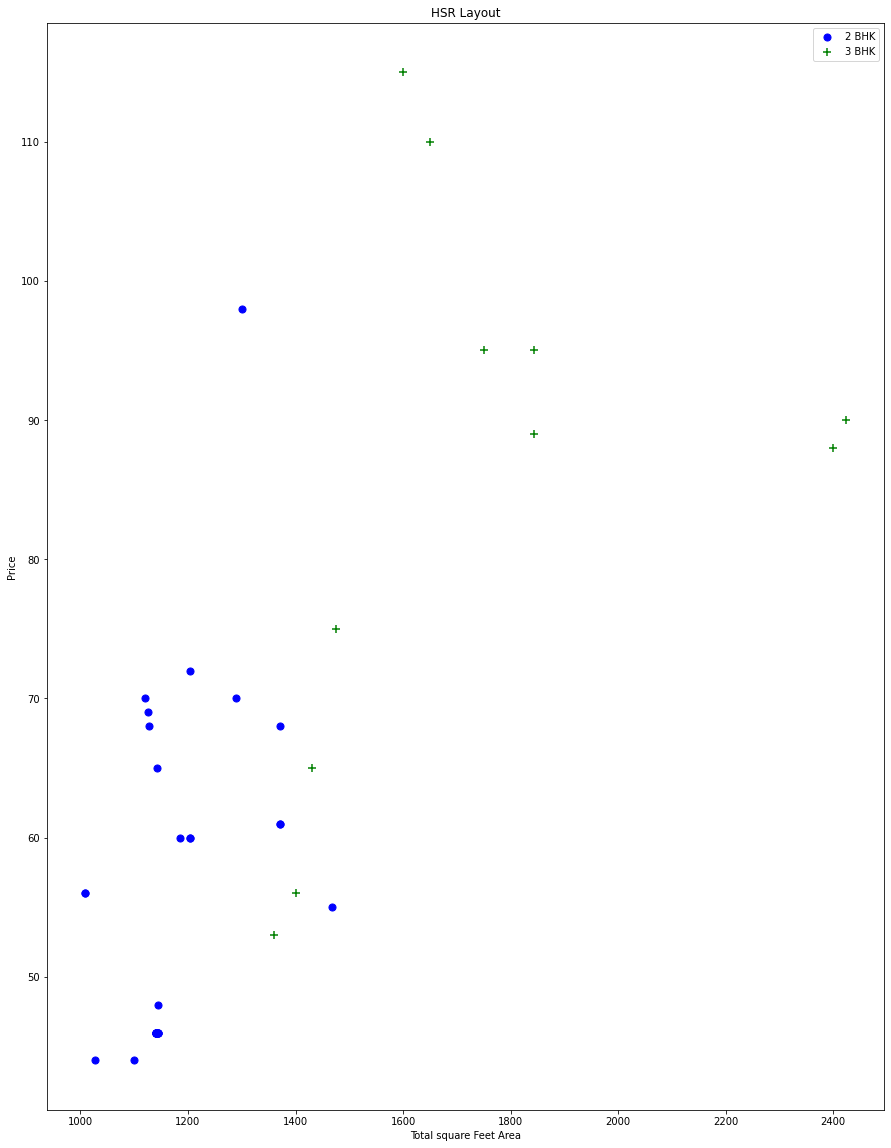

In [38]:
def ploter(df,loc):
    bhk2=df[(df.location==loc) & (df.BHK==2)]
    bhk3=df[(df.location==loc) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,20)
    pt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    pt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    pt.xlabel("Total square Feet Area")
    pt.ylabel("Price")
    pt.title(loc)
    pt.legend()
ploter(new_update_data,'HSR Layout')

In [39]:
# remove price 2bhk>3bhk
def remove_outliner(df):
    exclude=np.array([])
    for loc , loc_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in loc_df.groupby('BHK'):
            bhk_stats={
                'mean':np.mean(bhk_df.price_per),
                'std':np.std(bhk_df.price_per),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in loc_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude=np.append(exclude,bhk_df[bhk_df.price_per<(stats['mean'])].index.values)
    return df.drop(exclude,axis='index')
            
data_new_remove_out=remove_outliner(new_update_data)
data_new_remove_out.shape

(10241, 7)

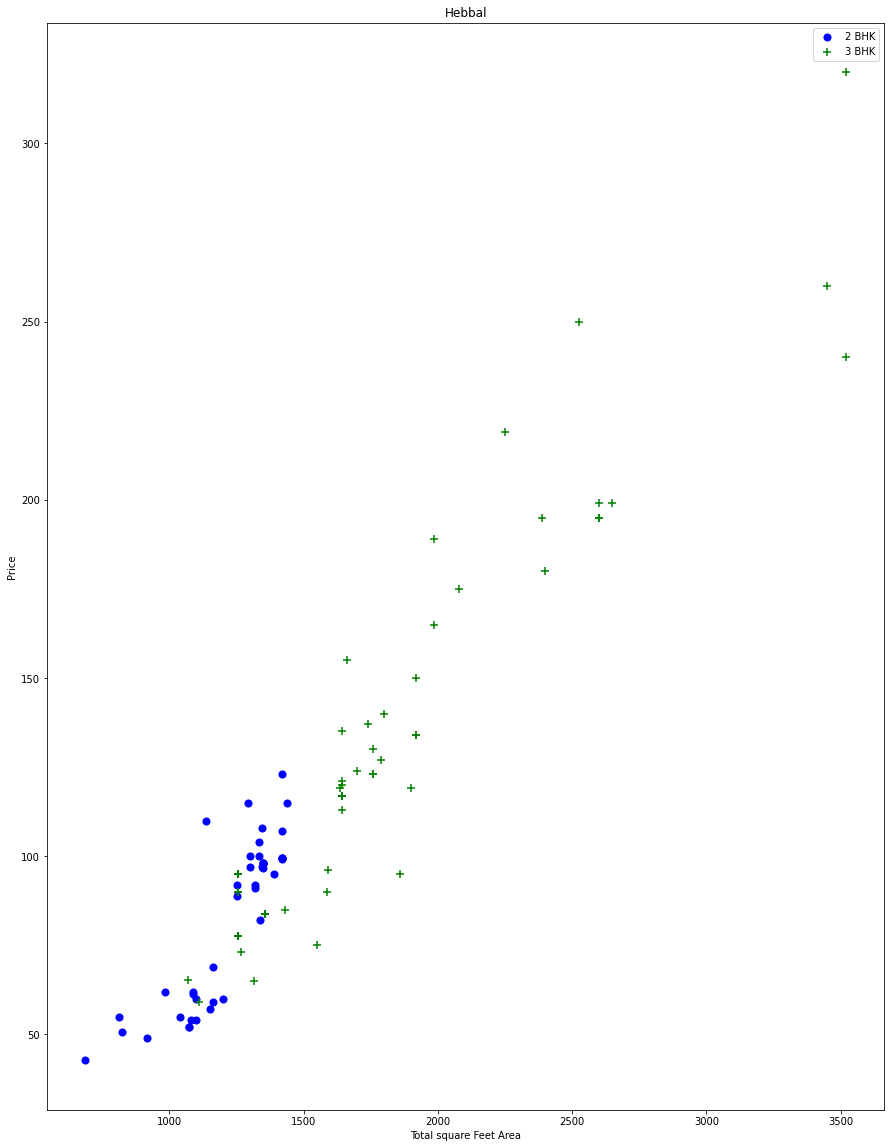

In [40]:
ploter(data_new_remove_out,'Hebbal')

## Histogram of price per sqt

Text(0, 0.5, 'count')

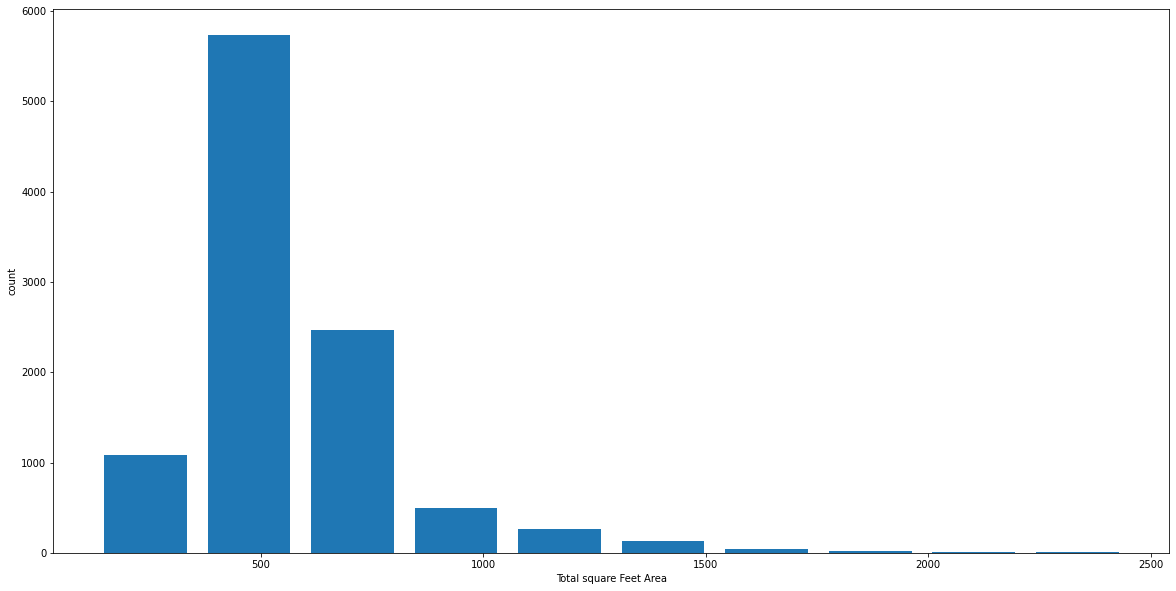

In [41]:
matplotlib.rcParams['figure.figsize']=(20,10)
pt.hist(data_new_remove_out.price_per,rwidth=0.8)
pt.xlabel("Total square Feet Area")
pt.ylabel("count")

In [42]:
data_new_remove_out.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
print("Total number of records having more then 10 baths = ",data_new_remove_out[data_new_remove_out.bath>10].count().sum())
data_new_remove_out[data_new_remove_out.bath>10]

Total number of records having more then 10 baths =  35


,location,size,total_sqft,bath,price,BHK,price_per
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,437.500000
8575,other,16 BHK,10000.0,16.0,550.0,16,550.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,250.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,506.912442


(array([6.543e+03, 2.620e+03, 9.120e+02, 1.070e+02, 4.400e+01, 1.000e+01,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

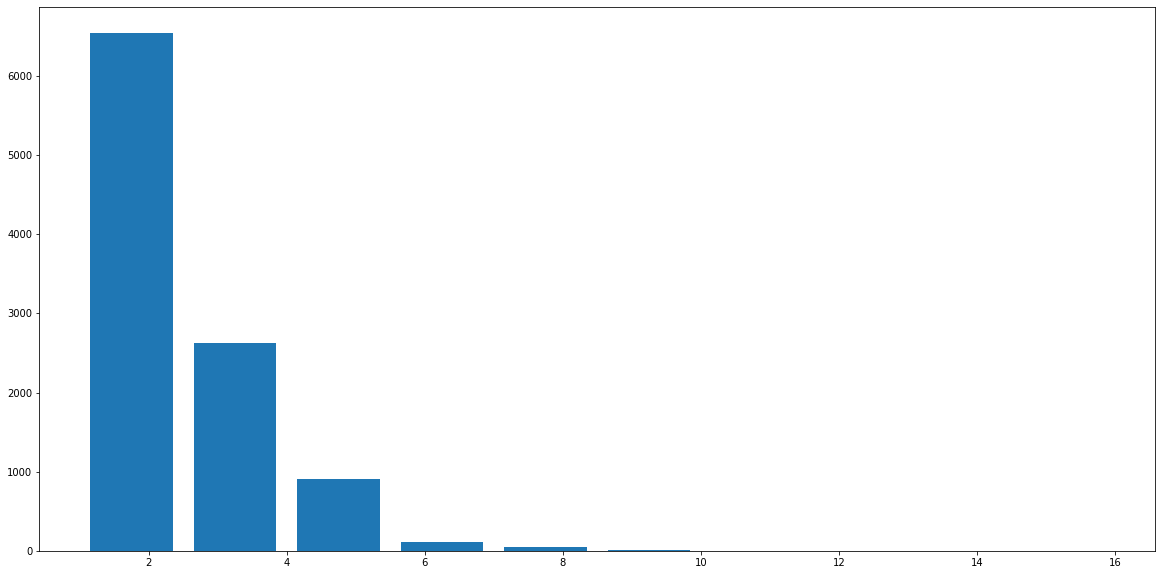

In [44]:
matplotlib.rcParams['figure.figsize']=(20,10)
pt.hist(data_new_remove_out.bath,rwidth=0.8)


In [45]:

data_new_remove_out[data_new_remove_out.bath>data_new_remove_out.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433
8411,other,6 BHK,11338.0,9.0,1000.0,6,881.989769


In [46]:
df_remove_bath_final=data_new_remove_out[data_new_remove_out.bath<data_new_remove_out.BHK+2]
df_remove_bath_final.shape

(10147, 7)

# Applying ML Algorithms

In [47]:
df_out=df_remove_bath_final.drop(['size','price_per'],axis='columns')
df_out.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### Using pandas dummy technique to convert the charcter to numeric

In [48]:
dummies=pd.get_dummies(df_out.location)


In [49]:
df_out_new=pd.concat([df_out,dummies.drop('other',axis='columns')],axis='columns')
df_out_new.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_new1=df_out_new.drop('location',axis='columns')
df_new1.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
x=df_new1.drop('price',axis='columns')
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y=df_new1.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## Modeling the data

In [53]:
# using the sklearn model testing and the traning method
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [54]:
# creating linear regression model
from sklearn.linear_model import LinearRegression
lr_crf=LinearRegression()
lr_crf.fit(X_train,Y_train)
lr_crf.score(X_test,Y_test)

0.7919477337586669

In [55]:
# K-flod cross valodation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
# test all the of cases to check the accuracy
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)


array([0.81155684, 0.77261421, 0.80214981, 0.80426801, 0.79827292])

## Running the data on the different models Using the grid system (API OF THE Sklearn)

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos={
        'linear regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
        
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for k,v in algos.items():
        gs=GridSearchCV(v['model'],v['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':k,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [57]:
find_best_model(x,y)

,model,best_score,best_params
0,linear regression,0.797772,{'normalize': True}
1,lasso,0.665145,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.697348,"{'criterion': 'mse', 'splitter': 'random'}"


## Going with Linear regression

In [58]:
np.where(x.columns=='1st Block Jayanagar')[0][0]

3

In [59]:
def predict_price_function(location,sqft,bath,BHK):
    location_index=np.where(x.columns==location)[0][0]
    u=np.zeros(len(x.columns))
    u[0]=sqft
    u[1]=bath
    u[2]=BHK
    if location_index>=0:
        u[location_index]=1
    return lr_crf.predict([u])[0]
    

In [60]:
predict_price_function('1st Block Jayanagar',1000,2,2)

186.6827823962834

In [61]:
predict_price_function('1st Block Jayanagar',1000,3,3)

188.23667395096973

In [62]:
predict_price_function('Indira Nagar',1000,2,2)

168.61759521899765

In [63]:
predict_price_function('1st Block Jayanagar',1000,2,3)

181.3890682182652

## Import the pickle and json file

In [64]:
import pickle
with open('Home_prices_model.pickle','wb') as f:
    pickle.dump(lr_crf,f)

In [65]:
import json
columns={
    "data_columns":[col.lower() for col in x.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))